In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:\codes_programming\py files\Datasets\\bikebuyer.csv")

In [3]:
df

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,22820.0,Married,Male,100000,4.0,High School,Professional,Yes,3,1.0,Europe,52,No
6993,22821.0,Married,Female,130000,4.0,Partial College,Professional,Yes,4,2.0,Europe,52,No
6994,22823.0,Married,Female,160000,5.0,Bachelors,Management,Yes,2,1.0,Europe,53,No
6995,22825.0,Single,Female,120000,5.0,Partial College,Professional,Yes,3,1.0,Europe,54,No


In [4]:
df.describe()

,ID,Yearly Income,Children,Cars,Commute Distance,Age
count,6996.000000,6997.000000,6979.000000,6997.000000,6968.000000,6997.000000
mean,17744.435249,57020.151493,1.111621,1.586823,4.210103,45.107332
std,4337.428859,32080.449720,1.600912,1.146782,2.926211,11.916654
min,2.000000,0.000000,0.000000,0.000000,1.000000,25.000000
25%,14249.750000,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,17406.500000,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,20609.500000,70000.000000,2.000000,2.000000,6.000000,53.000000
max,29476.000000,170000.000000,5.000000,4.000000,13.000000,96.000000


In [5]:
df.isnull().any()

ID                   True
Marital Status       True
Gender               True
Yearly Income       False
Children             True
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance     True
Region              False
Age                 False
Bike Buyer          False
dtype: bool

In [6]:
df['Marital Status'].fillna(df['Marital Status'].mode()[0],inplace=True) #inplace=true makes changes permanent
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)



In [7]:
df['Children'].mean() #decimal so take median instead

1.1116205760137556

In [8]:
df['Children'].fillna(df['Children'].median(),inplace=True)

In [9]:
print("range is: ",df['Commute Distance'].max()-df['Commute Distance'].min())

range is:  12.0


In [10]:
df['Commute Distance'].unique() #cannot take mean 

array([ 1.,  2.,  5., nan, 10., 11.,  6., 12.,  9.,  8., 13.,  3.,  4.,
        7.])

In [11]:
df['Commute Distance'].fillna(df['Commute Distance'].median(),inplace=True)

In [12]:
df.isnull().any()

ID                   True
Marital Status      False
Gender              False
Yearly Income       False
Children            False
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance    False
Region              False
Age                 False
Bike Buyer          False
dtype: bool

In [13]:
df.drop(['ID','Education','Home Owner'],axis=1,inplace=True) #axis=1 means columns

In [14]:
df

,Marital Status,Gender,Yearly Income,Children,Occupation,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Clerical,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Clerical,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Professional,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Management,2,5.0,Pacific,47,No
4,Married,Female,70000,2.0,Skilled Manual,1,1.0,North America,38,Yes
...,...,...,...,...,...,...,...,...,...,...
6992,Married,Male,100000,4.0,Professional,3,1.0,Europe,52,No
6993,Married,Female,130000,4.0,Professional,4,2.0,Europe,52,No
6994,Married,Female,160000,5.0,Management,2,1.0,Europe,53,No
6995,Single,Female,120000,5.0,Professional,3,1.0,Europe,54,No


In [15]:
#now encoding textual columns

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Region'] = le.fit_transform(df['Region'])
df['Bike Buyer'] = le.fit_transform(df['Bike Buyer'])

In [20]:
df

,Marital Status,Gender,Yearly Income,Children,Occupation,Cars,Commute Distance,Region,Age,Bike Buyer
0,1,1,30000,0.0,0,1,1.0,0,33,1
1,0,0,40000,0.0,0,0,1.0,0,37,1
2,0,1,160000,5.0,3,3,2.0,0,55,0
3,1,1,160000,0.0,1,2,5.0,2,47,0
4,0,0,70000,2.0,4,1,1.0,1,38,1
...,...,...,...,...,...,...,...,...,...,...
6992,0,1,100000,4.0,3,3,1.0,0,52,0
6993,0,0,130000,4.0,3,4,2.0,0,52,0
6994,0,0,160000,5.0,1,2,1.0,0,53,0
6995,1,0,120000,5.0,3,3,1.0,0,54,0


In [21]:
df['Occupation'].unique() # 0-clerical,3 - professional, 1 - management. 4 - skilled manual, 2 - manual

array([0, 3, 1, 4, 2])

In [22]:
df['Region'].unique() # 0-europe,2-pacific, 1- northamerica

array([0, 2, 1])

In [23]:
#use values to convert to numpy arrays
x=df.iloc[:,:9].values
y=df.iloc[:,9:].values

In [24]:
x

array([[1.0e+00, 1.0e+00, 3.0e+04, ..., 1.0e+00, 0.0e+00, 3.3e+01],
       [0.0e+00, 0.0e+00, 4.0e+04, ..., 1.0e+00, 0.0e+00, 3.7e+01],
       [0.0e+00, 1.0e+00, 1.6e+05, ..., 2.0e+00, 0.0e+00, 5.5e+01],
       ...,
       [0.0e+00, 0.0e+00, 1.6e+05, ..., 1.0e+00, 0.0e+00, 5.3e+01],
       [1.0e+00, 0.0e+00, 1.2e+05, ..., 1.0e+00, 0.0e+00, 5.4e+01],
       [0.0e+00, 1.0e+00, 1.3e+05, ..., 2.0e+00, 0.0e+00, 5.4e+01]])

In [25]:
y

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
x.shape

(6997, 9)

In [27]:
#9-2+8 = 15

In [28]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
#one hot encoding for Region and Occupation
occu_onehot = one.fit_transform(x[:,4:5]).toarray()
region_onehot = one.fit_transform(x[:,7:8]).toarray()

In [29]:
region_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [30]:
occu_onehot.shape

(6997, 5)

In [31]:
x = np.delete(x,[4,7],axis=1) #axis 1 means column
x.shape

(6997, 7)

In [32]:
x = np.concatenate((region_onehot,occu_onehot,x),axis=1)

In [33]:
x.shape

(6997, 15)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [35]:
x_test


array([[ 0.,  1.,  0., ...,  1.,  5., 48.],
       [ 0.,  0.,  1., ...,  2.,  1., 60.],
       [ 0.,  1.,  0., ...,  1.,  6., 59.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  2., 37.],
       [ 0.,  0.,  1., ...,  1.,  6., 49.],
       [ 0.,  1.,  0., ...,  0.,  5., 40.]])

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [37]:
#scale all your inputs
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [38]:
x_test

array([[-0.67363955,  0.96214456, -0.45027674, ..., -0.53708308,
         0.29126659,  0.22132995],
       [-0.67363955, -1.03934486,  2.22085645, ...,  0.3454478 ,
        -1.09101553,  1.22873799],
       [-0.67363955,  0.96214456, -0.45027674, ..., -0.53708308,
         0.63683712,  1.14478732],
       ...,
       [ 1.48447342, -1.03934486, -0.45027674, ..., -1.41961397,
        -0.745445  , -0.70212743],
       [-0.67363955, -1.03934486,  2.22085645, ..., -0.53708308,
         0.63683712,  0.30528062],
       [-0.67363955,  0.96214456, -0.45027674, ..., -1.41961397,
         0.29126659, -0.45027542]])

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred = dtc.predict(x_test)

In [41]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
#r2score is for regression
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8164285714285714

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [44]:
cm # true postive, true negative, false positive, false negative

array([[1060,  144],
       [ 113,   83]], dtype=int64)

In [45]:
import sklearn.metrics as metrics
#fpr - false positiv rate, tpr - true positive rate
#roc - reciever operator characteristics

In [46]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)

In [47]:
fpr

array([0.        , 0.11960133, 1.        ])

In [48]:
tpr

array([0.        , 0.42346939, 1.        ])

In [49]:
threshold

array([2, 1, 0])

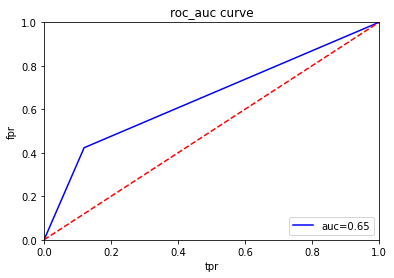

In [50]:
import matplotlib.pyplot as plt
plt.title("roc_auc curve")
plt.plot(fpr,tpr,'b',label='auc=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend(loc='lower right')

In [51]:
y_p = dtc.predict(sc.transform([[0,1,0,0,0,0,0,1,0,1,100000,4,2,5,32]]))

In [52]:
y_p

array([0])

## random forest classification

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [54]:
rfc.fit(x_train,y_train)

C:\Users\Vaibhav Thalanki\AppData\Local\Temp\ipykernel_12932\4070307935.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [55]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([1, 0, 0, ..., 1, 0, 0])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rfc)

0.845

In [57]:
confusion_matrix(y_test,y_pred_rfc)

array([[1128,   76],
       [ 141,   55]], dtype=int64)

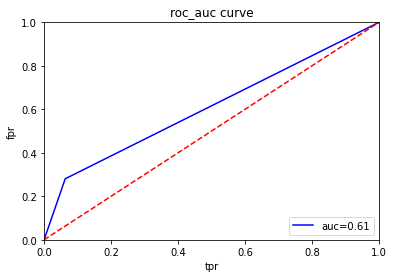

In [58]:
fpr1,tpr1,threshold1 = metrics.roc_curve(y_test,y_pred_rfc)
roc_auc1 = metrics.auc(fpr1,tpr1)
import matplotlib.pyplot as plt
plt.title("roc_auc curve")
plt.plot(fpr1,tpr1,'b',label='auc=%0.2f'%roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend(loc='lower right')

In [59]:
#if auc is less than 0.7 then has to be improved

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

d:\python\python386\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
accuracy_score(y_test,y_pred_lr)

0.8607142857142858

In [64]:
confusion_matrix(y_test,y_pred_lr)

array([[1204,    0],
       [ 195,    1]], dtype=int64)

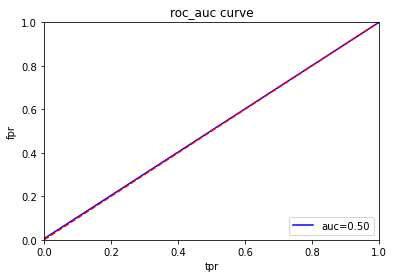

In [65]:
fpr2,tpr2,threshold2 = metrics.roc_curve(y_test,y_pred_lr)
roc_auc2 = metrics.auc(fpr2,tpr2)
import matplotlib.pyplot as plt
plt.title("roc_auc curve")
plt.plot(fpr2,tpr2,'b',label='auc=%0.2f'%roc_auc2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend(loc='lower right')

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(x_train,y_train)

d:\python\python386\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [75]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 1, 0])

In [76]:
accuracy_score(y_test,y_pred_knn)

0.8542857142857143

In [77]:
confusion_matrix(y_test,y_pred_knn)

array([[1161,   43],
       [ 161,   35]], dtype=int64)

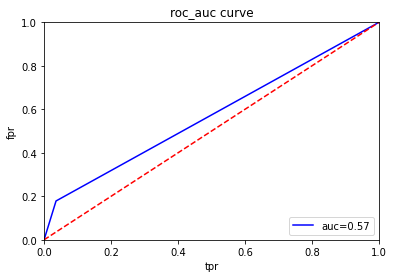

In [78]:
fpr3,tpr3,threshold3 = metrics.roc_curve(y_test,y_pred_knn)
roc_auc3 = metrics.auc(fpr3,tpr3)
import matplotlib.pyplot as plt
plt.title("roc_auc curve")
plt.plot(fpr3,tpr3,'b',label='auc=%0.2f'%roc_auc3)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend(loc='lower right')